In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization
from tensorflow.keras.optimizers import Adam

from tqdm import tqdm 

import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Check data types
print(f"x_train data type: {type(x_train)}")
print(f"y_train data type: {type(y_train)}")
print(f"x_test data type: {type(x_test)}")
print(f"y_test data type: {type(y_test)}\n")

# Check shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}\n")

# Check unique values in target variables
print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Unique values in y_test: {np.unique(y_test)}\n")

# Check if there is any missing data
print(f"Any missing values in x_train: {np.any(np.isnan(x_train))}")
print(f"Any missing values in y_train: {np.any(np.isnan(y_train))}")
print(f"Any missing values in x_test: {np.any(np.isnan(x_test))}")
print(f"Any missing values in y_test: {np.any(np.isnan(y_test))}")

x_train data type: <class 'numpy.ndarray'>
y_train data type: <class 'numpy.ndarray'>
x_test data type: <class 'numpy.ndarray'>
y_test data type: <class 'numpy.ndarray'>

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]

Any missing values in x_train: False
Any missing values in y_train: False
Any missing values in x_test: False
Any missing values in y_test: False


In [4]:
def mnist_statistical_summary(x_train):
    print("MNIST Dataset Statistics:")
    print(f"Total samples: {x_train.shape[0]}")
    print(f"Image dimensions: {x_train.shape[1:3]}")
    print(f"Pixel intensity range: {x_train.min()} - {x_train.max()}")
    print(f"Mean pixel intensity: {x_train.mean()}")
    print(f"Standard deviation of pixel intensity: {x_train.std()}")

mnist_statistical_summary(x_train)

MNIST Dataset Statistics:
Total samples: 60000
Image dimensions: (28, 28)
Pixel intensity range: 0 - 255
Mean pixel intensity: 33.318421449829934
Standard deviation of pixel intensity: 78.56748998339798


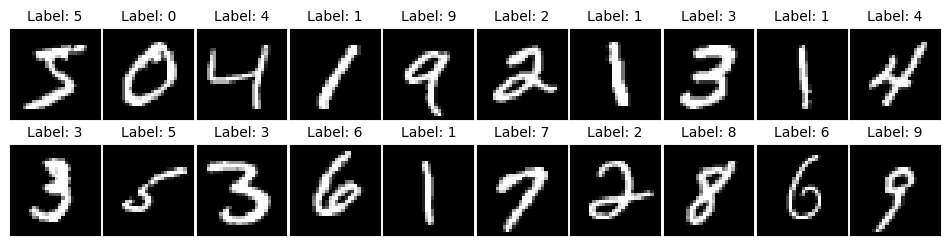

In [5]:
def visualize_images(data):
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(12,3),
                             gridspec_kw={'wspace':0.04, 'hspace':0.01}, 
                             squeeze=True)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(x_train[i], cmap='gray')
        plt.title(f"Label: {y_train[i]}")
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_title(f"Label: {str(y_train[i])}", fontsize=10)
        
    plt.tight_layout()
    plt.show()

visualize_images(x_train)

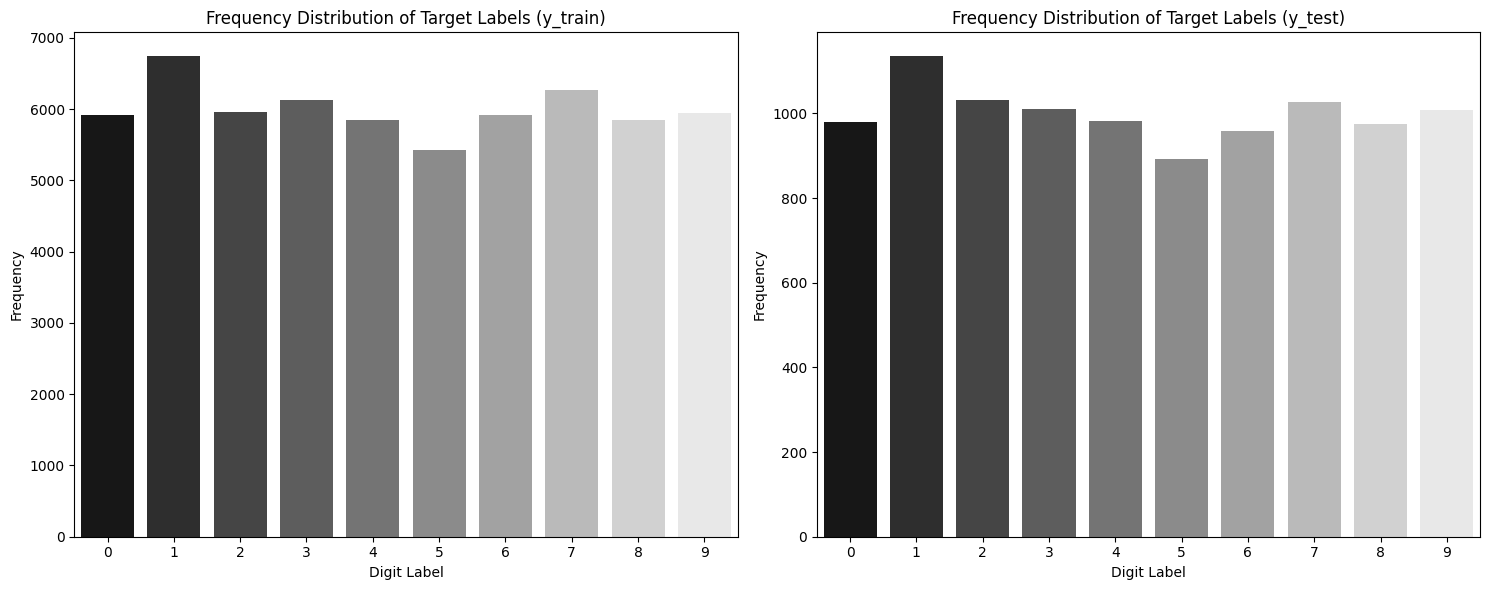

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x=y_train, palette='gray', ax=axes[0])
axes[0].set_title('Frequency Distribution of Target Labels (y_train)')
axes[0].set_xlabel('Digit Label')
axes[0].set_ylabel('Frequency')

sns.countplot(x=y_test, palette='gray', ax=axes[1])
axes[1].set_title('Frequency Distribution of Target Labels (y_test)')
axes[1].set_xlabel('Digit Label')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Normalization**

In [7]:
print("*************************** BEFORE NORMALIZATON ***************************\n")
print(x_train[0])
x_train = x_train/255
print("\n\n\n---------------------------------------------------------------------------\n\n\n")
print("************************** AFTER NORMALIZATON ***************************\n")
print(x_train[0])

*************************** BEFORE NORMALIZATON ***************************

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0 

Adjusting dimensions (28x28) --> (28, 28, 1)

In [8]:
print("Before Adjusting Dimensions x_train shape: ", x_train.shape)
x_train = np.expand_dims(x_train, axis=-1)
print("After Adjusting Dimensions x_train shape: ", x_train.shape)

Before Adjusting Dimensions x_train shape:  (60000, 28, 28)
After Adjusting Dimensions x_train shape:  (60000, 28, 28, 1)


In [15]:
def build_discriminator():
    model = Sequential()

    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same", input_shape=(28,28,1)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

    return model

In [16]:
build_discriminator().summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,769 (315.50 KB)

 Trainable params: 80,769 (315.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
z_dim=100
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*256, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7,7,256)))
    model.add(BatchNormalization())

    model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    
    model.add(Conv2DTranspose(64, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    
    model.add(Conv2DTranspose(1, kernel_size=3, strides=1, padding="same", activation="tanh"))

    return model

In [18]:
build_generator().summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 12544)               │       1,266,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 14, 14, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_8 (Conv2DTranspose) │ (None, 28, 28, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,638,145 (6.25 MB)

 Trainable params: 1,637,249 (6.25 MB)

 Non-trainable params: 896 (3.50 KB)

In [19]:
def build_gan(generator, discriminator):
    discriminator.trainable = False

    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss="binary_crossentropy", optimizer= Adam(0.0002, 0.5))

    return model

In [20]:
discriminator = build_discriminator()
generator = build_generator()
gan = build_gan(generator, discriminator)

In [21]:
gan.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)            │ (None, 28, 28, 1)           │       1,638,145 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 1)                   │          80,769 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,718,914 (6.56 MB)

 Trainable params: 1,637,249 (6.25 MB)

 Non-trainable params: 81,665 (319.00 KB)

Training Process:   0%|          | 0/500 [00:00<?, ?it/s]


0/500 d_loss: 0.6897667646408081, g_loss: 0.690772533416748


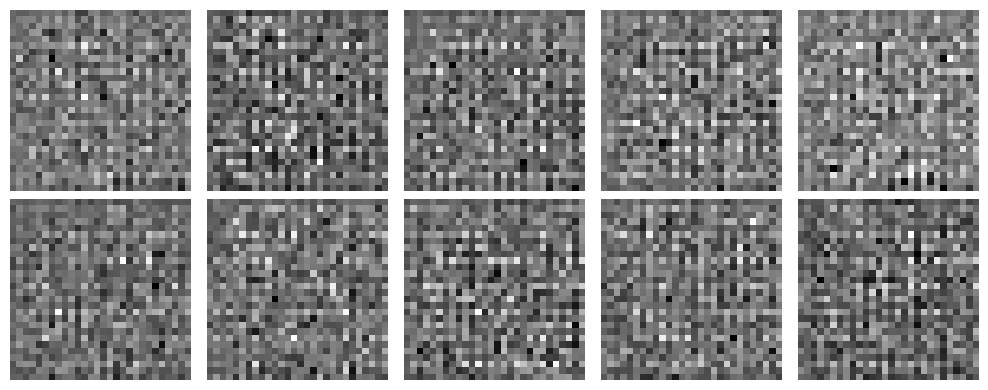

Training Process:  20%|██        | 100/500 [01:27<06:10,  1.08it/s]


100/500 d_loss: 0.6967461109161377, g_loss: 0.6968423128128052


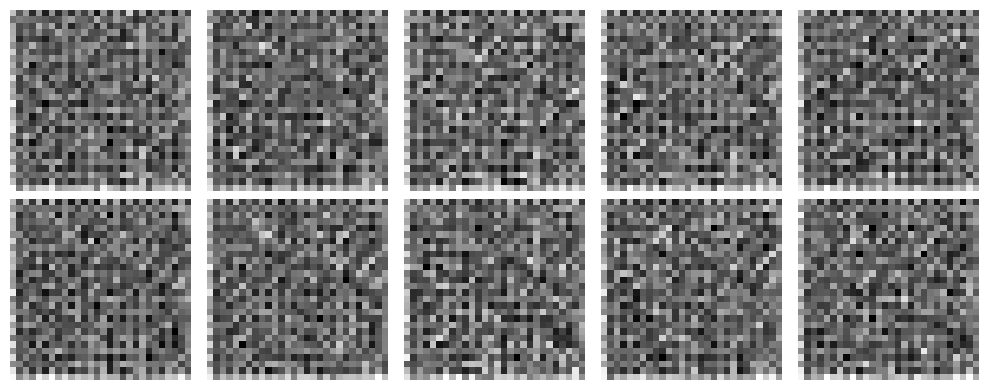

Training Process:  40%|████      | 200/500 [02:56<04:33,  1.10it/s]


200/500 d_loss: 0.7312235236167908, g_loss: 0.7315548658370972


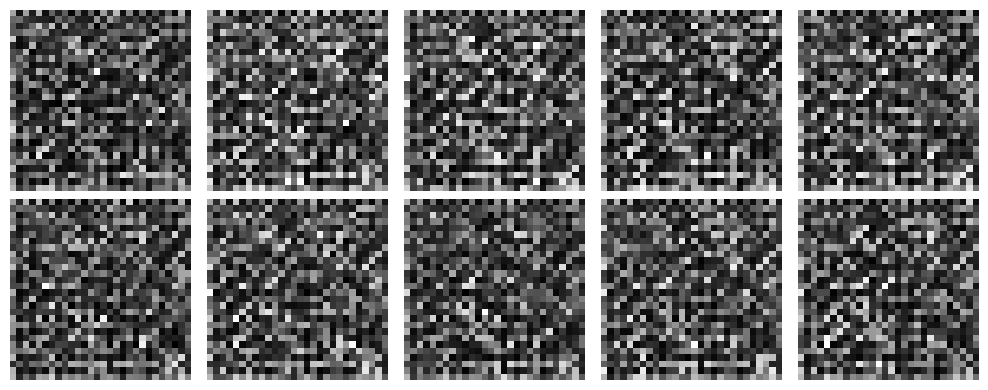

Training Process:  60%|██████    | 300/500 [04:30<03:07,  1.07it/s]


300/500 d_loss: 0.8110763430595398, g_loss: 0.8116608262062073


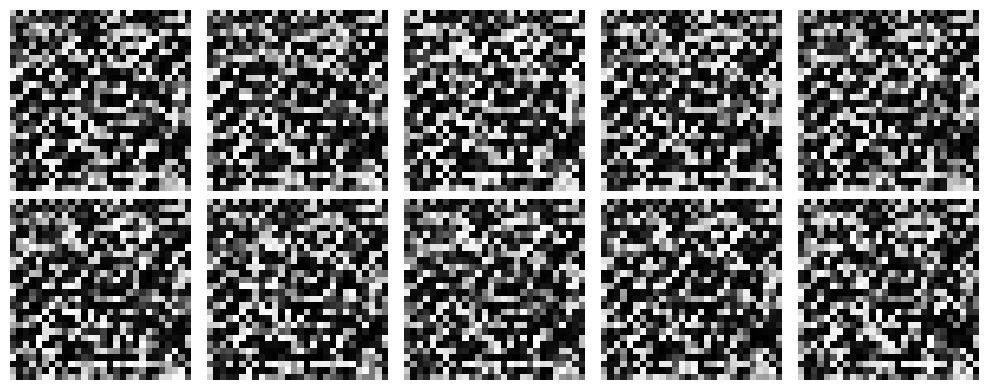

Training Process:  80%|████████  | 400/500 [06:08<01:38,  1.02it/s]


400/500 d_loss: 0.9056288003921509, g_loss: 0.906211256980896


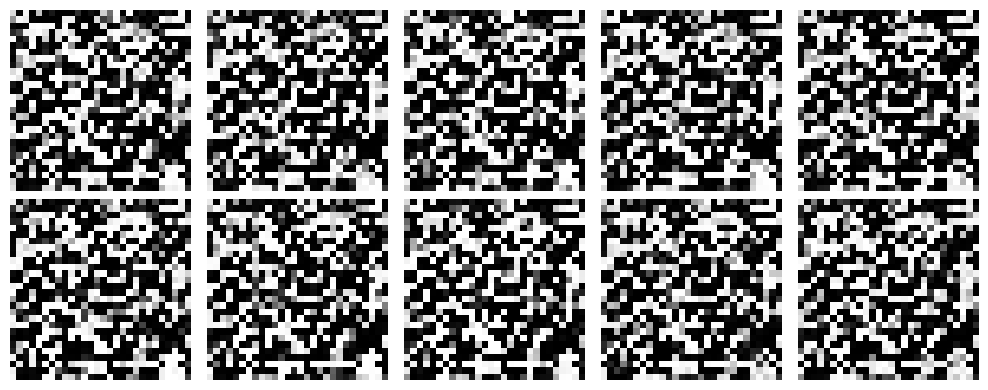

Training Process: 100%|██████████| 500/500 [07:51<00:00,  1.06it/s]


In [22]:
epochs = 500
batch_size = 64
half_batch = batch_size // 2

for epoch in tqdm(range(epochs), desc = "Training Process"):
    idx = np.random.randint(0, x_train.shape[0], half_batch)
    real_images = x_train[idx]
    real_labels = np.ones((half_batch, 1))

    noise = np.random.normal(0, 1, (half_batch, z_dim))
    fake_images = generator.predict(noise, verbose = 0)
    fake_labels = np.zeros((half_batch, 1))

    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
    d_loss = np.add(d_loss_real, d_loss_fake) * 0.5

    noise = np.random.normal(0, 1, (batch_size, z_dim))
    valid_y = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_y)

    if epoch %100 == 0:
        print(f"\n{epoch}/{epochs} d_loss: {d_loss[0]}, g_loss: {g_loss[0]}")

        noise = np.random.normal(0, 1, (10, z_dim))
        gen_images = generator.predict(noise, verbose=0)
        gen_images = 0.5 * gen_images + 0.5  # Görüntüleri [0, 1] aralığına getir

        fig, axes = plt.subplots(2, 5, figsize=(10, 4))
        for i, ax in enumerate(axes.ravel()):
            ax.imshow(gen_images[i, :, :, 0], cmap='gray')
            ax.axis('off')
        plt.tight_layout()
        plt.show()

In [23]:
def plot_generated_images(generator, examples=10, dim=(1, 10)):
    noise = np.random.normal(0, 1, (examples, z_dim))
    gen_images = generator.predict(noise, verbose=0)
    gen_images = 0.5 * gen_images + 0.5

    plt.figure(figsize=(10,1))
    for i in range(gen_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(gen_images[i, :, :, 0], cmap="gray")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

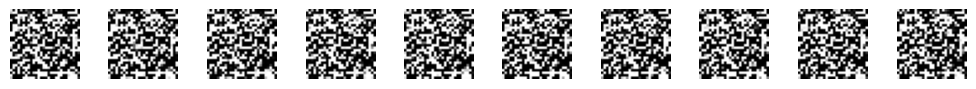

In [24]:
plot_generated_images(generator)